# **Simple Sentiment Analysis**

The main objective of Sentiment Analysis is to measure the inclination of people's opinions. It majorly uses Natural Language Processing(NLP), Computational Linguistics, and Text Analysis. 

It is widely used to categorize customer reviews as positive or negative reviews. For example, 

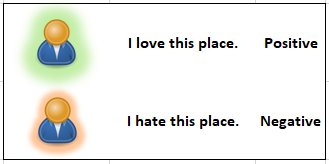

#### **Contents**

1. Setup Kaggle on Colab Notebook
2. Download Required Libraries
3. Required Libraries
4. Read Dataset
5. Dataset Overview
6. Prepare Dataset
7. A Quick Example using VADER
8. For All Reviews
9. Append Results to Reviews Dataframe
10. Assigning Sentiment Tag
11. Final Result
12. Download Results as CSV File 

### **Setup Kaggle on Colab Notebook**
Reference: https://www.kaggle.com/general/74235 

In [ ]:
!pip install -q kaggle
from google.colab import files 
files.upload()

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-07-30 09:11:59           9955  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6105  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2269  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2522  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

### **Download Required Libraries**

In [3]:
!pip install -U nltk

     |████████████████████████████████| 1.5 MB 10.7 MB/s 
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

### **Required Libraries**

In [5]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

### **Read Dataset**

In [6]:
#Download Dataset as zip file
!kaggle datasets download -d arushchillar/disneyland-reviews

 45% 5.00M/11.1M [00:00<00:00, 22.9MB/s]
100% 11.1M/11.1M [00:00<00:00, 31.9MB/s]


In [7]:
#Unzip Dataset zip file
!unzip /content/disneyland-reviews.zip

Archive:  /content/disneyland-reviews.zip
  inflating: DisneylandReviews.csv   


In [8]:
#Read Dataset
data=pd.read_csv("/content/DisneylandReviews.csv",encoding='latin-1')
data.head(5)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


### **Dataset Overview**

In [9]:
rows,cols=data.shape
print("Rows:",rows,"Cols:",cols)

Rows: 42656 Cols: 6


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [11]:
data.describe()

,Review_ID,Rating
count,4.265600e+04,42656.000000
mean,3.188553e+08,4.217695
std,1.657092e+08,1.063371
min,1.398724e+06,1.000000
25%,1.743274e+08,4.000000
50%,2.907583e+08,5.000000
75%,4.489579e+08,5.000000
max,6.708014e+08,5.000000


### **Prepare Dataset**

In [23]:
reviews=data[["Review_ID","Review_Text"]]
reviews.head(5)

,Review_ID,Review_Text
0,670772142,If you've ever been to Disneyland anywhere you...
1,670682799,Its been a while since d last time we visit HK...
2,670623270,Thanks God it wasn t too hot or too humid wh...
3,670607911,HK Disneyland is a great compact park. Unfortu...
4,670607296,"the location is not in the city, took around 1..."


### **A Quick Example using VADER**

In [24]:
rev=reviews['Review_Text'][0]
rev

"If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides  its a Small World  is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well. "

In [25]:
analyzer=SentimentIntensityAnalyzer()

In [26]:
analyzer.polarity_scores(rev)

{'compound': 0.7069, 'neg': 0.0, 'neu': 0.887, 'pos': 0.113}

* Pos: Positive Review Degree
* Neg: Negative Review Degree
* Neu: Neutral Review Degree
* Compound: It ranges from -1(very negative) to +1(very positive). 

### **For All Reviews**

In [27]:
body=reviews.Review_Text
neg,neu,pos,compound=[],[],[],[]
for review in body:
  res=analyzer.polarity_scores(str(review))
  neg.append(res['neg'])
  neu.append(res['neu'])
  pos.append(res['pos'])
  compound.append(res['compound'])
  

### **Append Results to Reviews Dataframe**

In [29]:
reviews["Negative"]=neg
reviews["Neutral"]=neu
reviews["Positive"]=pos
reviews["Compound"]=compound
reviews.head(5)

,Review_ID,Review_Text,Negative,Neutral,Positive,Compound
0,670772142,If you've ever been to Disneyland anywhere you...,0.000,0.887,0.113,0.7069
1,670682799,Its been a while since d last time we visit HK...,0.040,0.730,0.231,0.9901
2,670623270,Thanks God it wasn t too hot or too humid wh...,0.024,0.742,0.235,0.9920
3,670607911,HK Disneyland is a great compact park. Unfortu...,0.080,0.760,0.160,0.8489
4,670607296,"the location is not in the city, took around 1...",0.000,0.899,0.101,0.2846


### **Assigning Sentiment Tag**

In [30]:
tag=[]
for i in range(len(reviews)):
  winning_val=max(neg[i],pos[i])
  if(neg[i]==winning_val):
    tag.append("Negative")
  elif(pos[i]==winning_val):
    tag.append("Positive")

In [31]:
reviews["Sentiment_Tag"]=tag

### **Final Result**

In [32]:
reviews.sample(5)

,Review_ID,Review_Text,Negative,Neutral,Positive,Compound,Sentiment_Tag
29314,647199345,Disneyland paris is one of the biggest one in ...,0.000,1.000,0.000,0.0000,Negative
3463,417334514,This was my first visit to any Disneyland and ...,0.024,0.721,0.255,0.9876,Positive
22536,195565444,"Disneyland was wonderful. We spent 2 days, 1 i...",0.000,0.578,0.422,0.9551,Positive
15841,363989590,DL has a charm all of its own. A great little ...,0.000,0.661,0.339,0.9251,Positive
21393,219859143,Disneyland was busy but else what do you expec...,0.000,0.877,0.123,0.7351,Positive


In [21]:
tt=len(reviews)
pp=reviews["Sentiment_Tag"][reviews["Sentiment_Tag"]=="Positive"].count()
nn=reviews["Sentiment_Tag"][reviews["Sentiment_Tag"]=="Negative"].count()

print("Number of Reviews:",tt)
print("Number of Positive Reviews:",pp)
print("Number of Negative Reviews:",nn)

Number of Reviews: 42656
Number of Positive Reviews: 37761
Number of Negative Reviews: 4895


### **Download Results as CSV File**

In [22]:
reviews.to_csv("Result_Disneyland_Reviews.csv")

**Further Reading:** https://www.codeproject.com/Articles/5269445/Using-Pre-trained-VADER-Models-for-NLTK-Sentiment 